In [157]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import io
import requests
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [158]:
# Sets seed for the entire notebook

np.random.seed(42)

In [159]:
# Import data

url = "https://raw.githubusercontent.com/julesz12345/MLflow_BankruptcyPrediction/main/Data.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [160]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

*No missing values and no categorical variables in the dataset*

In [162]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(6819, 96)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [163]:
# Cheking for unique values

display(df[' Liability-Assets Flag'].nunique())
display(df[' Net Income Flag'].nunique())

2

1

In [164]:
# Dropping 1 column
# Net Income Flag

df = df.drop([' Net Income Flag'], axis=1)

Text(0, 0.5, 'Number of companies')

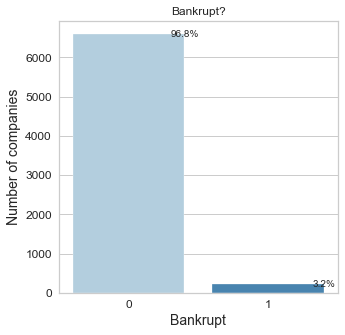

In [165]:
# We are checking for imbalanced data
# Print figure

import seaborn as sns

plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

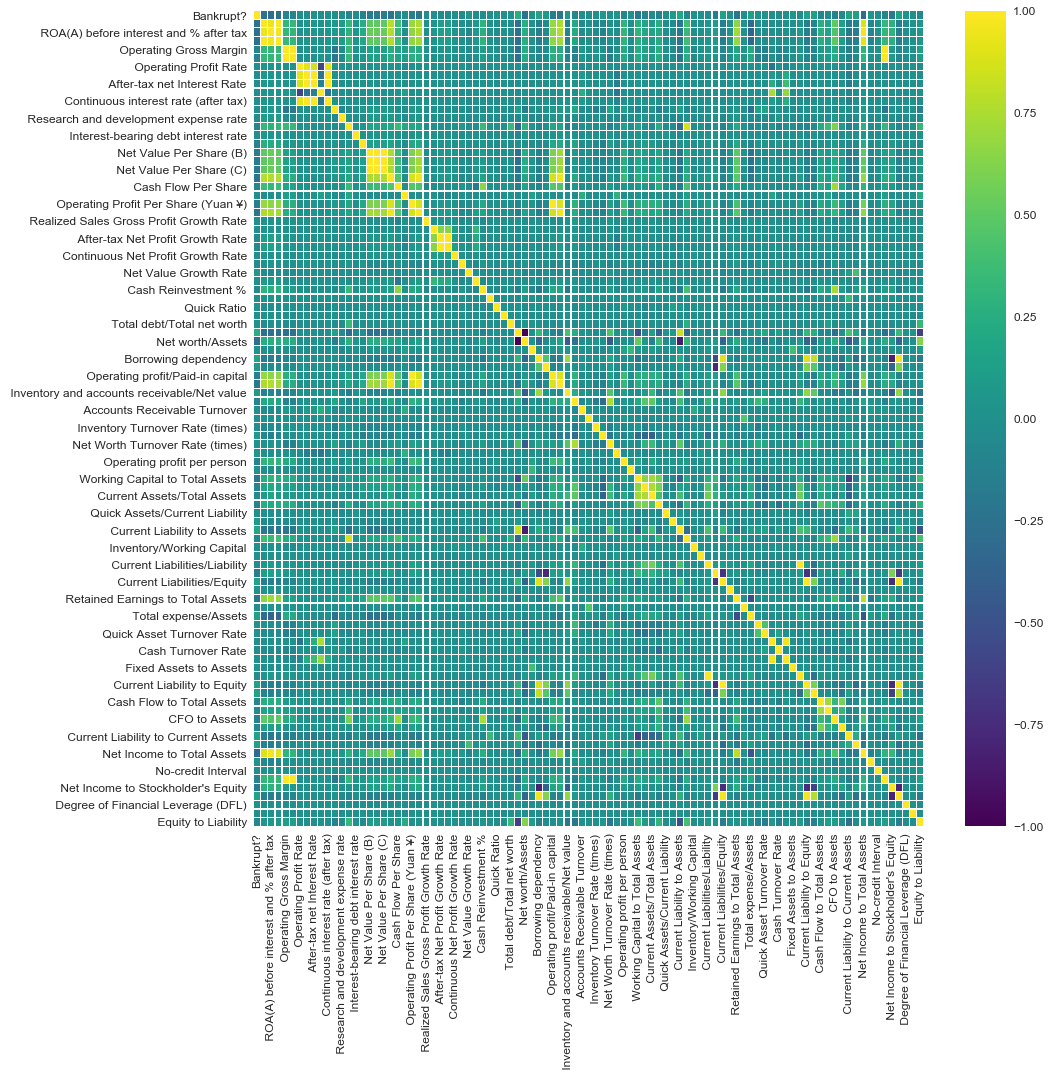

In [166]:
# Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [167]:
# Variable creation

X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

## Preparing Data for ML models
*Splitting the data*

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test_final, y_train, y_test_final = train_test_split(X,y, test_size=0.2, random_state=42)

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

In [170]:
X_train.shape

(4091, 94)

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(X_train)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

In [172]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
X_test_final_prepared = full_pipeline.transform(X_test_final)

In [173]:
X_train_prepared = pd.DataFrame(X_train_prepared, columns=num_attribs)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=num_attribs)
X_test_final_prepared = pd.DataFrame(X_test_final_prepared, columns=num_attribs)

In [174]:
display(X_train.shape)
display(y_train.shape)

(4091, 94)

(4091,)

In [175]:
count = 0
for i in y_train:
    if i == 1:
        count +=1
print("There are",count,"cases of bankruptcy and",len(y_train)-count,"of non-bankruptcy")

There are 128 cases of bankruptcy and 3963 of non-bankruptcy


In [176]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [177]:
y_train.reset_index(inplace=True)
y_train.drop(columns='index',axis=1,inplace=True)
y_test.reset_index(inplace=True)
y_test.drop(columns='index',inplace=True)
y_train.head()

,Bankrupt?
0,0
1,0
2,0
3,0
4,0


### Base Model

In [178]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve



def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('ADABoost' , AdaBoostClassifier()))
    models.append(('XGB' , xgb.XGBClassifier()))
    models.append(('LightGBM' , lgb.LGBMClassifier()))
    return models

def bl_performance(X_train, y_train,models):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    results = []
    names = []
    acc = []
    f1 = []
    recall = []
    precision = []
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=['accuracy','f1','recall','precision'])
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results['test_accuracy'].mean()))
        print('{}: CV F1 score mean: {:.4}'.format(name, cv_results['test_f1'].mean()))
        print('{}: CV Recall score mean: {:.4}'.format(name, cv_results['test_recall'].mean()))
        print('{}: CV Precision score mean: {:.4}'.format(name, cv_results['test_precision'].mean()))
        acc += [cv_results['test_accuracy'].mean()]
        f1 += [cv_results['test_f1'].mean()]
        recall += [cv_results['test_recall'].mean()]
        precision += [cv_results['test_precision'].mean()]
        
        model.fit(X_train_prepared,y_train)
        y_pred = model.predict(X_test_prepared)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        
        
        plt.plot(fpr, tpr, label='{} Classifier Score: {:.4f}'.format(name,roc_auc_score(y_test, y_pred)))
        
        
        
    result_df = pd.DataFrame()
    result_df['Model'] = ['LR','KNN','SVM','GBC','RF','MLP','LDA','ADABoost','XGB','LightGBM']
    result_df['Accuracy'] = acc
    result_df['F1'] = f1
    result_df['Recall'] = recall
    result_df['Precision'] = precision
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
        
    return names, results, result_df

{'fit_time': array([0.1784997 , 0.17613316, 0.15401411, 0.12281299, 0.15380621]), 'score_time': array([0.06581831, 0.01216197, 0.00898051, 0.        , 0.01009893]), 'test_accuracy': array([0.96581197, 0.96210269, 0.9608802 , 0.97555012, 0.96577017]), 'test_f1': array([0.26315789, 0.34042553, 0.30434783, 0.375     , 0.17647059]), 'test_recall': array([0.22727273, 0.25806452, 0.25      , 0.28571429, 0.11538462]), 'test_precision': array([0.3125    , 0.5       , 0.38888889, 0.54545455, 0.375     ])}
LR: CV accuracy mean: 0.966
LR: CV F1 score mean: 0.2919
LR: CV Recall score mean: 0.2273
LR: CV Precision score mean: 0.4244
{'fit_time': array([0.        , 0.00694466, 0.03455687, 0.00712013, 0.        ]), 'score_time': array([0.25572777, 0.20074415, 0.19984412, 0.09396243, 0.2115798 ]), 'test_accuracy': array([0.97313797, 0.96577017, 0.9608802 , 0.97555012, 0.97066015]), 'test_f1': array([0.26666667, 0.17647059, 0.05882353, 0.28571429, 0.25      ]), 'test_recall': array([0.18181818, 0.09677

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



{'fit_time': array([0.23401928, 0.28233051, 0.09980321, 0.25445509, 0.17852545]), 'score_time': array([0.12661481, 0.11956477, 0.05339789, 0.21531272, 0.12827468]), 'test_accuracy': array([0.97313797, 0.96210269, 0.96454768, 0.97432763, 0.96821516]), 'test_f1': array([0., 0., 0., 0., 0.]), 'test_recall': array([0., 0., 0., 0., 0.]), 'test_precision': array([0., 0., 0., 0., 0.])}
SVM: CV accuracy mean: 0.9685
SVM: CV F1 score mean: 0.0
SVM: CV Recall score mean: 0.0
SVM: CV Precision score mean: 0.0
{'fit_time': array([ 7.48637676, 12.8435142 ,  8.96109676,  8.59820938,  6.77351856]), 'score_time': array([0.04739809, 0.00898147, 0.008044  , 0.00499105, 0.01952505]), 'test_accuracy': array([0.97191697, 0.95843521, 0.95843521, 0.96943765, 0.96332518]), 'test_f1': array([0.37837838, 0.29166667, 0.29166667, 0.32432432, 0.31818182]), 'test_recall': array([0.31818182, 0.22580645, 0.25      , 0.28571429, 0.26923077]), 'test_precision': array([0.46666667, 0.41176471, 0.35      , 0.375     , 0.3

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.5548389 , 1.07113504, 1.05517745, 1.19838953, 1.00929999]), 'score_time': array([0.01496029, 0.01695371, 0.01595616, 0.01496029, 0.01595688]), 'test_accuracy': array([0.97313797, 0.97188264, 0.96821516, 0.97555012, 0.96454768]), 'test_f1': array([0.26666667, 0.46511628, 0.31578947, 0.33333333, 0.29268293]), 'test_recall': array([0.18181818, 0.32258065, 0.21428571, 0.23809524, 0.23076923]), 'test_precision': array([0.5       , 0.83333333, 0.6       , 0.55555556, 0.4       ])}
XGB: CV accuracy mean: 0.9707
XGB: CV F1 score mean: 0.3347
XGB: CV Recall score mean: 0.2375
XGB: CV Precision score mean: 0.5778
[22:49:41] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



{'fit_time': array([1.05617452, 1.14294171, 1.51894498, 1.07013798, 1.22745156]), 'score_time': array([0.02293897, 0.01097012, 0.01894069, 0.01396179, 0.03589511]), 'test_accuracy': array([0.97802198, 0.97066015, 0.97066015, 0.97310513, 0.97066015]), 'test_f1': array([0.4       , 0.42857143, 0.33333333, 0.26666667, 0.36842105]), 'test_recall': array([0.27272727, 0.29032258, 0.21428571, 0.19047619, 0.26923077]), 'test_precision': array([0.75      , 0.81818182, 0.75      , 0.44444444, 0.58333333])}
LightGBM: CV accuracy mean: 0.9726
LightGBM: CV F1 score mean: 0.3594
LightGBM: CV Recall score mean: 0.2474
LightGBM: CV Precision score mean: 0.6692


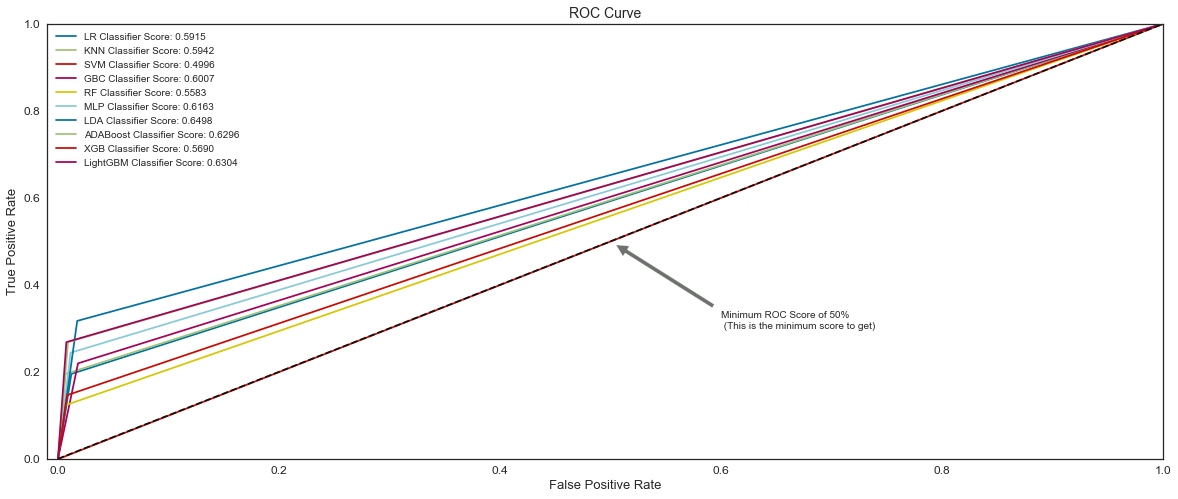

In [181]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train.values.ravel(),models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [182]:
result_df

,Model,Accuracy,F1,Recall,Precision
9,LightGBM,0.972622,0.359398,0.247409,0.669192
8,XGB,0.970667,0.334718,0.237510,0.577778
3,GBC,0.964310,0.320844,0.269787,0.398464
6,LDA,0.958932,0.317960,0.319660,0.320994
5,MLP,0.963823,0.301696,0.255284,0.380025
0,LR,0.966023,0.291880,0.227287,0.424369
7,ADABoost,0.963333,0.266796,0.223966,0.358517
4,RF,0.970910,0.261298,0.170903,0.640606
1,KNN,0.969200,0.207535,0.131726,0.580952
2,SVM,0.968466,0.000000,0.000000,0.000000


In [183]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## Feature Selection, resampling and data transformation

In [184]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(X_train_prepared)
score = iforest.decision_function(X_train_prepared)
from numpy import where
anom_index = where(pred==-1)
values = X.iloc[anom_index]

for i in values.index:
    X_train_prepared = X_train_prepared.drop(i)
    y_train = y_train.drop(i)

In [185]:
ctr = len(values)
print("Number of observations dropped = {}".format(ctr))

Number of observations dropped = 41


In [187]:
# Modelling with balanced target 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_prepared, y_train.values.ravel())

sel = SelectFromModel(model)
sel.fit(X_test_prepared, y_test.values.ravel())

selected_feat= X_train.columns[(sel.get_support())]

In [69]:
!pip install imblearn

In [70]:
# Dealing with imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

#X_train_prepared, y_train = pipeline.fit_resample(X_train_prepared, y_train)
over_sample=SMOTE()
X_train_prepared, y_train=over_sample.fit_resample(X_train_prepared,y_train)

In [71]:
display(X_train_prepared.shape)
display(y_train.shape)

(7866, 97)

(7866, 1)

Text(0, 0.5, 'Number of companies')

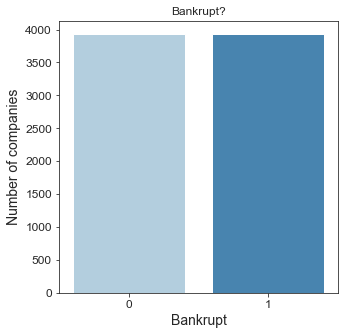

In [72]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = y_train, x = 'Bankrupt?', palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

### Dropping highly correlated columns (greater than 0.85)

In [73]:
!pip install rfpimp

In [74]:
import rfpimp
from rfpimp import plot_corr_heatmap
limit = 0.85
corr = X_train_prepared.corr()

In [75]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)

In [76]:
corr_no_diag

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Retained Earnings to Total Assets bin_0,Retained Earnings to Total Assets bin_1,Retained Earnings to Total Assets bin_2
ROA(C) before interest and depreciation before interest,NaN,0.94928,0.983953,0.444113,0.441916,0.023299,0.063800,0.065518,0.052283,0.062565,0.138388,-0.005485,0.388305,0.043754,0.414450,0.594471,0.592106,0.590001,0.854148,0.438701,0.006425,0.768332,0.840756,0.010635,0.036197,0.105547,0.106917,0.053165,0.146016,0.006770,0.094305,0.377428,0.016681,-0.060203,0.033881,-0.018698,-0.375898,0.375898,0.006425,-0.281579,-0.100605,0.767479,0.857086,-0.147446,0.234593,0.002770,-0.001835,-0.013369,-0.051441,0.070405,0.031889,0.423016,0.003525,0.353987,0.174537,0.091900,0.247939,0.199812,-0.063573,-0.355540,0.428686,0.000226,0.045794,-0.042594,0.257476,-0.352372,-0.009515,0.752437,0.549104,-0.543799,0.042482,-0.051857,-0.002971,0.065045,0.001716,0.018284,-0.042594,-0.352372,-0.051813,0.302346,0.177749,0.556215,0.273659,-0.223048,8.483389e-17,9.033658e-01,-1.592195e-01,4.334222e-02,4.441094e-01,8.199490e-01,-3.049351e-01,1.240826e-02,5.107019e-02,1.560456e-01,NaN,6.235870e-01,-7.221170e-02
ROA(A) before interest and % after tax,NaN,NaN,0.974975,0.424490,0.422497,0.020563,0.061451,0.064138,0.055003,0.059727,0.149409,-0.051253,0.348826,0.018514,0.381287,0.605758,0.603828,0.602709,0.823780,0.375326,0.008628,0.727839,0.813533,0.012087,0.

In [77]:
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]

In [78]:
## Highly corelated columns
coll

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Operating Funds to Liability',
 ' Working Capital/Equity',
 ' Current Liabilities/Equity',
 ' Working capitcal Turnover Rate',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

### Variance threshold

In [79]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_train_prepared)
var = sel.get_support()

col2 = []
for i in range(94):
    if not var[i]:
        col2.append(num_attribs[i])

In [80]:
col2

[' Revenue Per Share (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Contingent liabilities/Net worth',
 ' Revenue per person',
 ' Quick Assets/Current Liability',
 ' Working Capital/Equity',
 ' Cash Flow to Sales',
 ' Liability-Assets Flag',
 " Net Income to Stockholder's Equity"]

In [81]:
## Highly corelated columns with variance > 0.16
col_del = coll.copy()
for i in coll:
    if i not in col2:
        col_del.append(i)
col_del

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Operating Funds to Liability',
 ' Working Capital/Equity',
 ' Current Liabilities/Equity',
 ' Working capitcal Turnover Rate',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity',
 ' ROA(A) befor

In [82]:
## 31 columns removed
X_train_prepared_old = X_train_prepared.copy()
X_train_prepared.drop(columns=col_del,axis=1,inplace=True)

In [83]:
X_train_prepared.shape

(7866, 68)

In [84]:
'''
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)

filtered_col = correlation(df, 0.65).columns
df = df[filtered_col]
df
correlation(df, 0.65)
'''

'\ndef correlation(dataset, threshold):\n    col_corr = set() # Set of all the names of deleted columns\n    corr_matrix = dataset.corr()\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i):\n            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):\n                colname = corr_matrix.columns[i] # getting the name of column\n                col_corr.add(colname)\n                if colname in dataset.columns:\n                    del dataset[colname] # deleting the column from the dataset\n\n    return(dataset)\n\nfiltered_col = correlation(df, 0.65).columns\ndf = df[filtered_col]\ndf\ncorrelation(df, 0.65)\n'

### Tree-Based Feature Selection

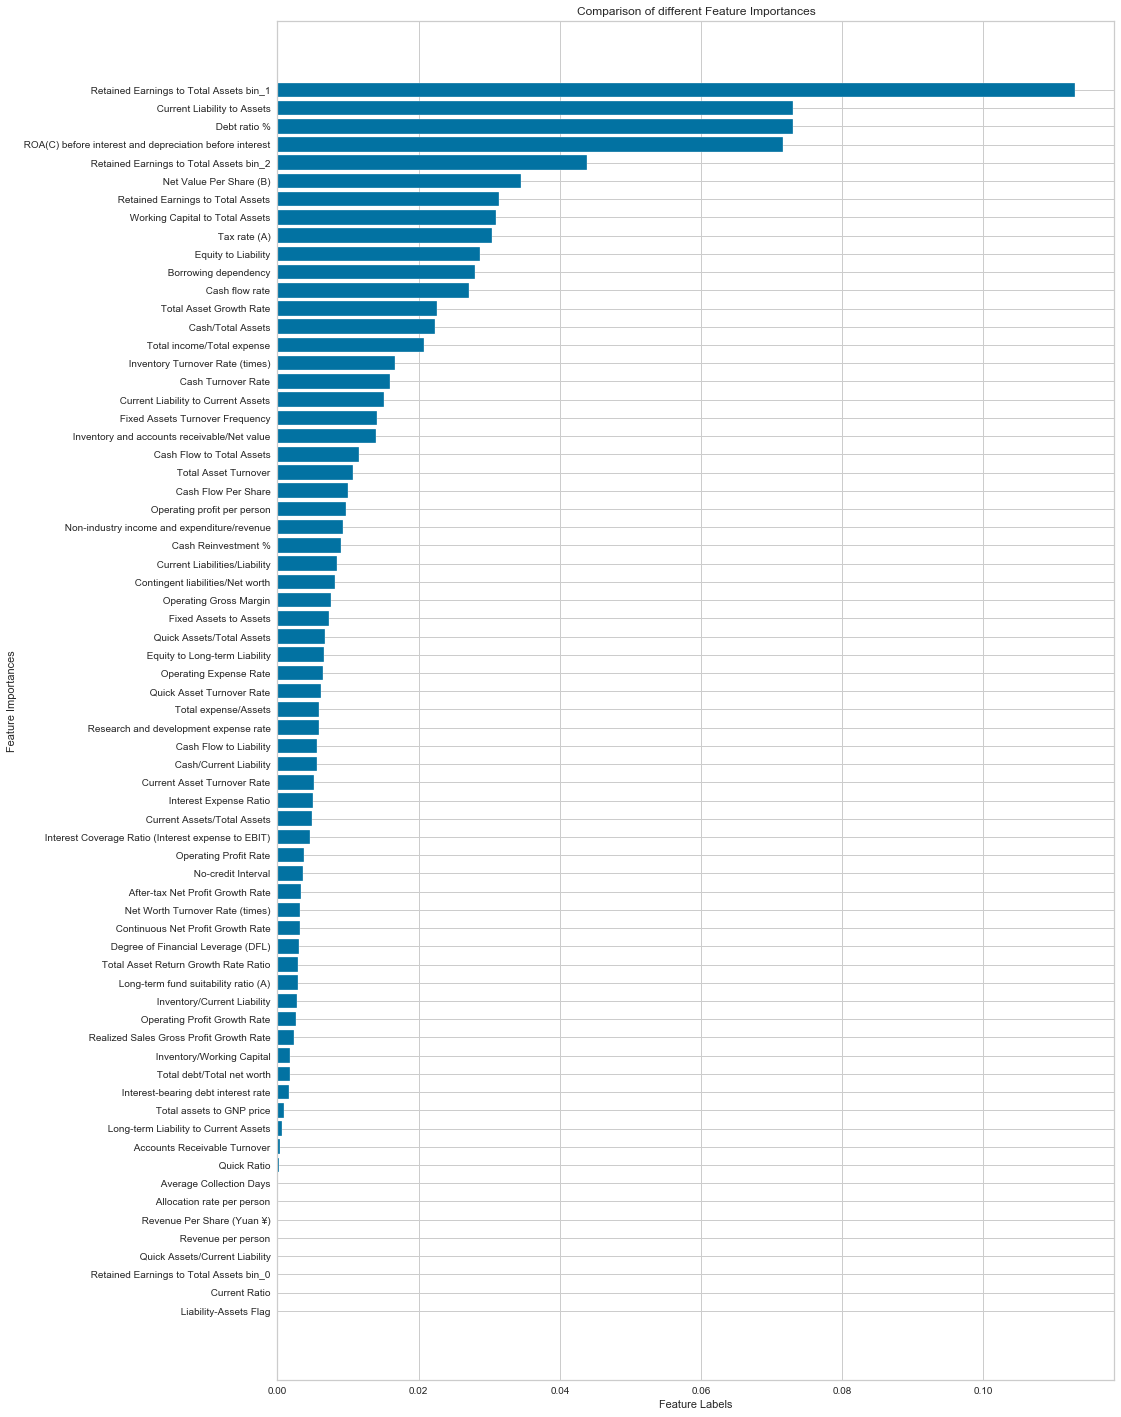

In [94]:
# feature selection (tree-based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(X_train_prepared, y_train.values.ravel())
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": X_train_prepared.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()


### Recursive Feature Elimination

In [95]:
!pip install yellowbrick

In [96]:
from sklearn.feature_selection import RFE
from sklearn import ensemble
from yellowbrick.features import RFECV

## RFE

rf = RandomForestClassifier(random_state=42)
model = RFE(rf, n_features_to_select=50)
fit_model = model.fit(X_train_prepared, y_train.values.ravel())
features = pd.DataFrame(list(zip(X_train_prepared.columns,fit_model.ranking_)), columns = ['predictor','ranking'])

In [97]:
features = features.sort_values(by = 'ranking')

In [98]:
## RFE and Tree based feature importance signify that features with rank greater than 3 in RFE are insignificant
chosen_features = features[features['ranking']<3]

In [99]:
chosen_features.shape

(51, 2)

### Sequential Feature Selection

In [100]:
'''
import datetime
from datetime import *
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso

rf = RandomForestClassifier()

## Forward SFE

now = datetime.now()
sfs_forward = SequentialFeatureSelector(rf,n_features_to_select=10,direction='forward').fit(X_train_prepared, y_train)
print("Forward Sequential Feature Selection done in {}".format(datetime.now()-now))

## Backward SFE
now = datetime.now()
sfs_backward = SequentialFeatureSelector(rf,direction='backward').fit(X_train_prepared, y_train)
print("Backward Sequential Feature Selection done in {}".format(datetime.now()-now))

bool = sfs_forward.get_support()

chosen_features.reset_index(inplace=True)
chosen_features.drop(columns='index',axis=1,inplace=True)
chosen_features.shape

## chosen features from forward sequential feature selection
fwd_features = []
for i in range(51):
    if bool[i]:
        fwd_features.append(chosen_features['predictor'][i])
fwd_features
sfs_backward.get_support()


X_train_prepared_small = X_train_prepared[fwd_features]
X_test_prepared_small = X_test_prepared[fwd_features]
'''

'\nimport datetime\nfrom datetime import *\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.linear_model import Lasso\n\nrf = RandomForestClassifier()\n\n## Forward SFE\n\nnow = datetime.now()\nsfs_forward = SequentialFeatureSelector(rf,n_features_to_select=10,direction=\'forward\').fit(X_train_prepared, y_train)\nprint("Forward Sequential Feature Selection done in {}".format(datetime.now()-now))\n\n## Backward SFE\nnow = datetime.now()\nsfs_backward = SequentialFeatureSelector(rf,direction=\'backward\').fit(X_train_prepared, y_train)\nprint("Backward Sequential Feature Selection done in {}".format(datetime.now()-now))\n\nbool = sfs_forward.get_support()\n\nchosen_features.reset_index(inplace=True)\nchosen_features.drop(columns=\'index\',axis=1,inplace=True)\nchosen_features.shape\n\n## chosen features from forward sequential feature selection\nfwd_features = []\nfor i in range(51):\n    if bool[i]:\n        fwd_features.append(chosen_features[\'predictor\

#### Selected Features

In [101]:
chosen_features

,predictor,ranking
0,ROA(C) before interest and depreciation befor...,1
31,Inventory Turnover Rate (times),1
66,Retained Earnings to Total Assets bin_1,1
35,Operating profit per person,1
37,Working Capital to Total Assets,1
38,Quick Assets/Total Assets,1
39,Current Assets/Total Assets,1
40,Cash/Total Assets,1
43,Current Liability to Assets,1
44,Inventory/Working Capital,1


In [102]:
## Training and test set with selected features
X_train_prepared = X_train_prepared[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

{'fit_time': array([0.10993361, 0.0999496 , 0.11489129, 0.1199646 , 0.11986423]), 'score_time': array([0.00992537, 0.00508189, 0.00509334, 0.00970531, 0.01073217]), 'test_accuracy': array([0.85578145, 0.8588684 , 0.90718373, 0.8862047 , 0.86904005]), 'test_f1': array([0.27476038, 0.25      , 0.90201342, 0.9396697 , 0.92993197]), 'test_recall': array([0.91489362, 0.925     , 0.96      , 0.8862047 , 0.86904005]), 'test_precision': array([0.16165414, 0.14453125, 0.85063291, 1.        , 1.        ])}
LR: CV accuracy mean: 0.8754
LR: CV F1 score mean: 0.6593
LR: CV Recall score mean: 0.911
LR: CV Precision score mean: 0.6314
{'fit_time': array([0.00500941, 0.01010132, 0.00512695, 0.00457907, 0.        ]), 'score_time': array([0.32475543, 0.31474376, 0.29526305, 0.29182029, 0.28875637]), 'test_accuracy': array([0.84942821, 0.87031151, 0.9224412 , 1.        , 0.99936427]), 'test_f1': array([0.28398792, 0.28169014, 0.91984231, 1.        , 0.99968203]), 'test_recall': array([1.        , 1.     

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.42500329, 1.69423199, 1.76846766, 1.71226645, 1.72516012]), 'score_time': array([0.01985955, 0.02019525, 0.01817727, 0.02013111, 0.01964235]), 'test_accuracy': array([0.97013977, 0.97075652, 0.98664971, 0.99745709, 0.99618563]), 'test_f1': array([0.65693431, 0.61666667, 0.98520085, 0.99872693, 0.99808917]), 'test_recall': array([0.95744681, 0.925     , 0.99857143, 0.99745709, 0.99618563]), 'test_precision': array([0.5       , 0.4625    , 0.97218359, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9842
XGB: CV F1 score mean: 0.8511
XGB: CV Recall score mean: 0.9749
XGB: CV Precision score mean: 0.7869
[22:14:03] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



{'fit_time': array([0.43237853, 0.44666004, 0.46050429, 0.41468143, 0.45590186]), 'score_time': array([0.02276564, 0.01976728, 0.0232451 , 0.02492642, 0.0261929 ]), 'test_accuracy': array([0.97013977, 0.97393516, 0.98792117, 0.99809282, 0.99745709]), 'test_f1': array([0.6618705 , 0.65546218, 0.98659139, 0.9990455 , 0.99872693]), 'test_recall': array([0.9787234 , 0.975     , 0.99857143, 0.99809282, 0.99745709]), 'test_precision': array([0.5       , 0.49367089, 0.9748954 , 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9855
LightGBM: CV F1 score mean: 0.8603
LightGBM: CV Recall score mean: 0.9896
LightGBM: CV Precision score mean: 0.7937


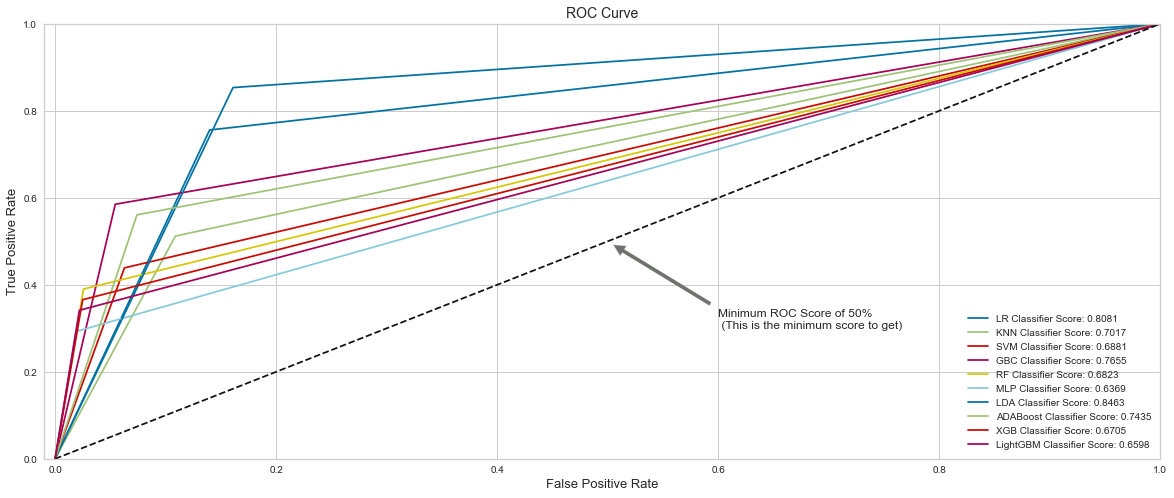

In [105]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train.values.ravel(),models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [106]:
result_df

,Model,Accuracy,F1,Recall,Precision
9,LightGBM,0.985509,0.860339,0.989569,0.793713
8,XGB,0.984238,0.851124,0.974932,0.786937
5,MLP,0.984493,0.848497,1.000000,0.777781
4,RF,0.978135,0.841642,0.991009,0.772484
3,GBC,0.961101,0.771059,0.948286,0.709103
2,SVM,0.957544,0.755718,0.996058,0.689305
7,ADABoost,0.935039,0.727213,0.902485,0.682250
1,KNN,0.928309,0.697040,0.999873,0.636202
0,LR,0.875416,0.659275,0.911028,0.631364
6,LDA,0.852536,0.637432,0.926649,0.612221


In [107]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## Dimensionality Reduction
### PCA

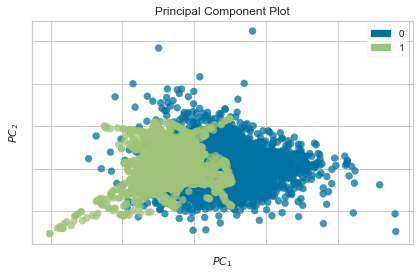

In [108]:
from yellowbrick.features.pca import (
 PCADecomposition,
)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
pca_viz = PCADecomposition(color=colors)
pca_viz.fit_transform(X_train_prepared, y_train['Bankrupt?'])
pca_viz.poof()

In [109]:
# Dimension Reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_prepared_PCA = pca.fit_transform(X_train_prepared)

{'fit_time': array([0.03580141, 0.019104  , 0.02251172, 0.01970744, 0.00960636]), 'score_time': array([0.00511312, 0.0080018 , 0.01044703, 0.01030684, 0.00955558]), 'test_accuracy': array([0.79669632, 0.80546726, 0.87730451, 0.81754609, 0.79910998]), 'test_f1': array([0.21568627, 0.19473684, 0.87294273, 0.89961525, 0.88833922]), 'test_recall': array([0.93617021, 0.925     , 0.94714286, 0.81754609, 0.79910998]), 'test_precision': array([0.12188366, 0.10882353, 0.80952381, 1.        , 1.        ])}
LR: CV accuracy mean: 0.8192
LR: CV F1 score mean: 0.6143
LR: CV Recall score mean: 0.885
LR: CV Precision score mean: 0.608
{'fit_time': array([0.03059602, 0.01960826, 0.02187753, 0.01465893, 0.02025604]), 'score_time': array([0.27993894, 0.24232292, 0.22087002, 0.19036317, 0.15914083]), 'test_accuracy': array([0.85133418, 0.86713287, 0.92498411, 0.99745709, 0.9955499 ]), 'test_f1': array([0.28658537, 0.27681661, 0.92226614, 0.99872693, 0.99776999]), 'test_recall': array([1.        , 1.      

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.83262467, 0.8534565 , 1.00695348, 1.03792167, 1.17780995]), 'score_time': array([0.01461172, 0.01612425, 0.0146246 , 0.0110805 , 0.01622391]), 'test_accuracy': array([0.93837357, 0.94787031, 0.96694215, 0.99237127, 0.98919263]), 'test_f1': array([0.48677249, 0.49382716, 0.96413793, 0.99617103, 0.99456695]), 'test_recall': array([0.9787234 , 1.        , 0.99857143, 0.99237127, 0.98919263]), 'test_precision': array([0.32394366, 0.32786885, 0.932     , 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9669
XGB: CV F1 score mean: 0.7871
XGB: CV Recall score mean: 0.9918
XGB: CV Precision score mean: 0.7168
[22:17:36] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



{'fit_time': array([0.33625102, 0.25534463, 0.33457589, 0.33034945, 0.31489229]), 'score_time': array([0.01971269, 0.01605105, 0.02013111, 0.01995397, 0.020226  ]), 'test_accuracy': array([0.93964422, 0.94151303, 0.96503497, 0.99109981, 0.98537826]), 'test_f1': array([0.49197861, 0.46511628, 0.96209511, 0.99553001, 0.99263529]), 'test_recall': array([0.9787234 , 1.        , 0.99714286, 0.99109981, 0.98537826]), 'test_precision': array([0.32857143, 0.3030303 , 0.92942743, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9645
LightGBM: CV F1 score mean: 0.7815
LightGBM: CV Recall score mean: 0.9905
LightGBM: CV Precision score mean: 0.7122


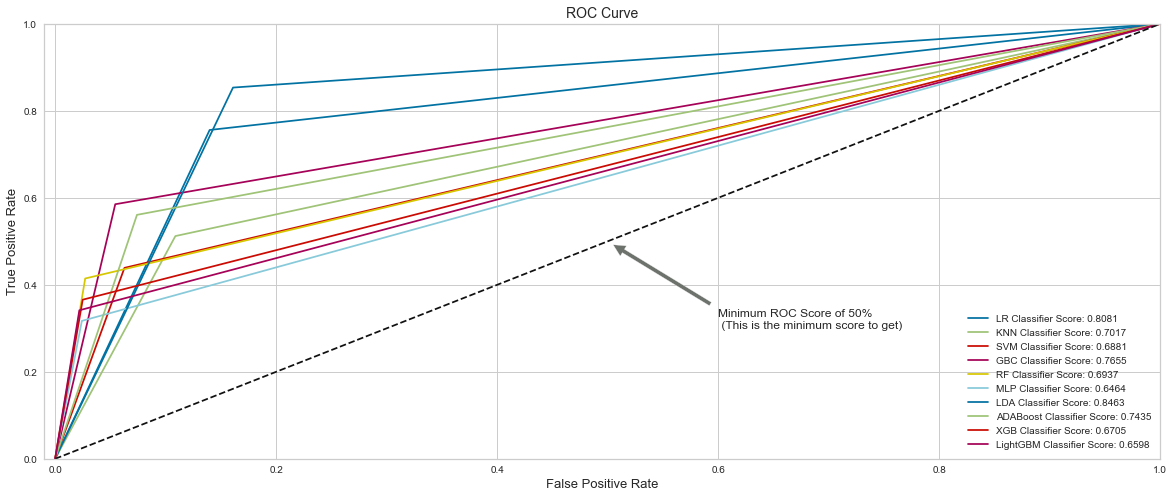

In [110]:
models = get_model()
names,results,result_df= bl_performance(X_train_prepared_PCA, y_train.values.ravel(),models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

In [111]:
result_df

,Model,Accuracy,F1,Recall,Precision
5,MLP,0.978009,0.826423,0.998856,0.753377
8,XGB,0.966950,0.787095,0.991772,0.716763
4,RF,0.959703,0.782976,0.983826,0.717195
9,LightGBM,0.964534,0.781471,0.990469,0.712206
2,SVM,0.916100,0.699772,0.971717,0.647968
1,KNN,0.927292,0.696433,0.998601,0.636730
3,GBC,0.902749,0.688243,0.948034,0.646308
7,ADABoost,0.854565,0.638542,0.870009,0.624235
0,LR,0.819225,0.614264,0.884994,0.608046
6,LDA,0.804989,0.603405,0.887155,0.598260


In [112]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

### t-SNE

Text(0, 0.5, 'Embedding 2')

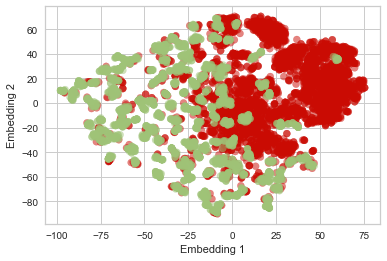

In [113]:
from sklearn.manifold import TSNE
ts = TSNE()
X_tsne = ts.fit_transform(X_train_prepared)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
scat = ax.scatter(
 X_tsne[:, 0],
 X_tsne[:, 1],
 c=colors,
 alpha=0.5,
)
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")

In [114]:
ts = TSNE(n_components=3)
X_tsne = ts.fit_transform(X_train_prepared)

{'fit_time': array([0.01269364, 0.0150919 , 0.01009274, 0.01454067, 0.01980114]), 'score_time': array([0.        , 0.00457692, 0.00947237, 0.00606418, 0.00500655]), 'test_accuracy': array([0.73697586, 0.75524476, 0.82263191, 0.73108709, 0.70565798]), 'test_f1': array([0.16532258, 0.15011038, 0.81237391, 0.84465663, 0.82743198]), 'test_recall': array([0.87234043, 0.85      , 0.86285714, 0.73108709, 0.70565798]), 'test_precision': array([0.09131403, 0.08232446, 0.76747141, 1.        , 1.        ])}
LR: CV accuracy mean: 0.7503
LR: CV F1 score mean: 0.56
LR: CV Recall score mean: 0.8044
LR: CV Precision score mean: 0.5882
{'fit_time': array([0.        , 0.00507998, 0.00507998, 0.        , 0.        ]), 'score_time': array([0.07289147, 0.09481406, 0.05972648, 0.06030965, 0.06730247]), 'test_accuracy': array([0.88564168, 0.89637635, 0.93579148, 0.97647807, 0.98347107]), 'test_f1': array([0.34306569, 0.32921811, 0.93244147, 0.98809907, 0.99166667]), 'test_recall': array([1.        , 1.      

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:23:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.64829659, 0.6361208 , 0.65490913, 0.67043853, 0.64793563]), 'score_time': array([0.01160932, 0.01884103, 0.01263046, 0.01012063, 0.01212788]), 'test_accuracy': array([0.91296061, 0.92561983, 0.94151303, 0.96058487, 0.95867769]), 'test_f1': array([0.40692641, 0.40609137, 0.9375    , 0.97989624, 0.97890295]), 'test_recall': array([1.        , 1.        , 0.98571429, 0.96058487, 0.95867769]), 'test_precision': array([0.25543478, 0.25477707, 0.89378238, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9399
XGB: CV F1 score mean: 0.7419
XGB: CV Recall score mean: 0.981
XGB: CV Precision score mean: 0.6808
[22:23:12] WARNING: C:/Users/Administrator/workspace/xgboo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



{'fit_time': array([0.14093351, 0.1551919 , 0.14464498, 0.14346266, 0.14000297]), 'score_time': array([0.01362324, 0.01313734, 0.01669121, 0.01810384, 0.01506615]), 'test_accuracy': array([0.90343075, 0.91544819, 0.93833439, 0.9612206 , 0.96948506]), 'test_f1': array([0.38211382, 0.37558685, 0.93459204, 0.9802269 , 0.98450613]), 'test_recall': array([1.        , 1.        , 0.99      , 0.9612206 , 0.96948506]), 'test_precision': array([0.2361809 , 0.23121387, 0.88505747, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9376
LightGBM: CV F1 score mean: 0.7314
LightGBM: CV Recall score mean: 0.9841
LightGBM: CV Precision score mean: 0.6705


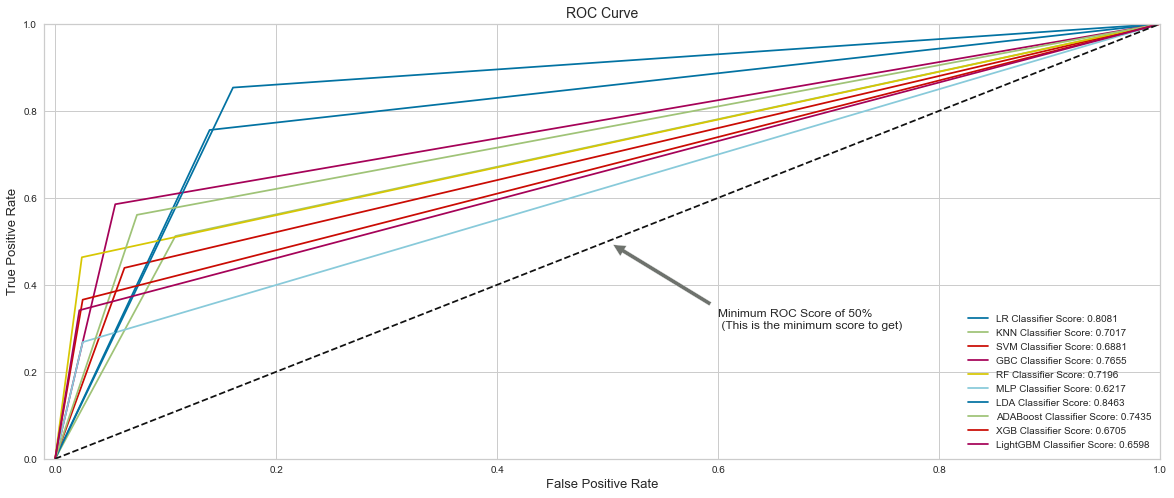

In [115]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_tsne, y_train.values.ravel(),models)

In [116]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

,Model,Accuracy,F1,Recall,Precision
4,RF,0.946737,0.750031,0.985254,0.687183
8,XGB,0.939871,0.741863,0.980995,0.680799
9,LightGBM,0.937584,0.731405,0.984141,0.670490
1,KNN,0.935552,0.716898,0.991133,0.656164
3,GBC,0.862323,0.648859,0.934001,0.623029
5,MLP,0.861308,0.643163,0.924733,0.614806
2,SVM,0.840456,0.628087,0.893743,0.613434
7,ADABoost,0.807911,0.600650,0.852401,0.602234
6,LDA,0.754389,0.562915,0.810777,0.586836
0,LR,0.750320,0.559979,0.804389,0.588222


In [117]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

### PHATE

In [118]:
!pip install phate

Calculating PHATE...
  Running PHATE on 7866 observations and 51 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.69 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 5.95 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.90 seconds.
    Calculating KMeans...
    Calculated KMeans in 25.03 seconds.
  Calculated landmark operator in 27.34 seconds.
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 3.75 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.83 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.01 seconds.
Calculated PHATE in 46.89 seconds.


C:\Users\Jules\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.



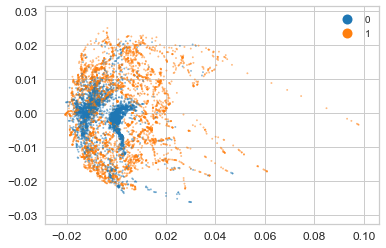

In [119]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X_train_prepared)
X_phate.shape
fig, ax = plt.subplots(figsize=(6, 4))
phate.plot.scatter2d(p, c=y_train['Bankrupt?'], ax=ax, alpha=0.5)

{'fit_time': array([0.02012563, 0.02007151, 0.02011919, 0.02998614, 0.02476406]), 'score_time': array([0.00981283, 0.01010871, 0.01004362, 0.01471186, 0.01016831]), 'test_accuracy': array([0.02986023, 0.02542912, 0.48633185, 0.00190718, 0.00127146]), 'test_f1': array([0.0579889 , 0.04959702, 0.56039173, 0.00380711, 0.00253968]), 'test_recall': array([1.        , 1.        , 0.73571429, 0.00190718, 0.00127146]), 'test_precision': array([0.02986023, 0.02542912, 0.45254833, 1.        , 1.        ])}
LR: CV accuracy mean: 0.109
LR: CV F1 score mean: 0.1349
LR: CV Recall score mean: 0.5478
LR: CV Precision score mean: 0.5016
{'fit_time': array([0.01010275, 0.00986791, 0.00204802, 0.00565171, 0.        ]), 'score_time': array([0.08966136, 0.07812381, 0.04931855, 0.05430269, 0.04799676]), 'test_accuracy': array([0.79669632, 0.7972028 , 0.86458996, 0.82835346, 0.83407502]), 'test_f1': array([0.22330097, 0.20050125, 0.85559322, 0.90611961, 0.90953206]), 'test_recall': array([0.9787234 , 1.     

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.62015009, 0.61697793, 0.61214685, 0.61096549, 0.5948844 ]), 'score_time': array([0.01198816, 0.01113081, 0.01316094, 0.01012278, 0.01658559]), 'test_accuracy': array([0.80368488, 0.79465989, 0.85060394, 0.81691036, 0.80292435]), 'test_f1': array([0.22942643, 0.19851117, 0.84110886, 0.89923023, 0.89069111]), 'test_recall': array([0.9787234 , 1.        , 0.88857143, 0.81691036, 0.80292435]), 'test_precision': array([0.1299435 , 0.11019284, 0.79845956, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.8138
XGB: CV F1 score mean: 0.6118
XGB: CV Recall score mean: 0.8974
XGB: CV Precision score mean: 0.6077
[22:28:31] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\Jules\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



{'fit_time': array([0.15513015, 0.12103534, 0.20183706, 0.1742413 , 0.14991546]), 'score_time': array([0.01207113, 0.01008463, 0.01866126, 0.01412106, 0.01444221]), 'test_accuracy': array([0.78589581, 0.7927527 , 0.84806103, 0.80991736, 0.80928163]), 'test_f1': array([0.21445221, 0.19704433, 0.83948959, 0.89497717, 0.8945889 ]), 'test_recall': array([0.9787234 , 1.        , 0.89285714, 0.80991736, 0.80928163]), 'test_precision': array([0.12041885, 0.10928962, 0.79214195, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.8092
LightGBM: CV F1 score mean: 0.6081
LightGBM: CV Recall score mean: 0.8982
LightGBM: CV Precision score mean: 0.6044


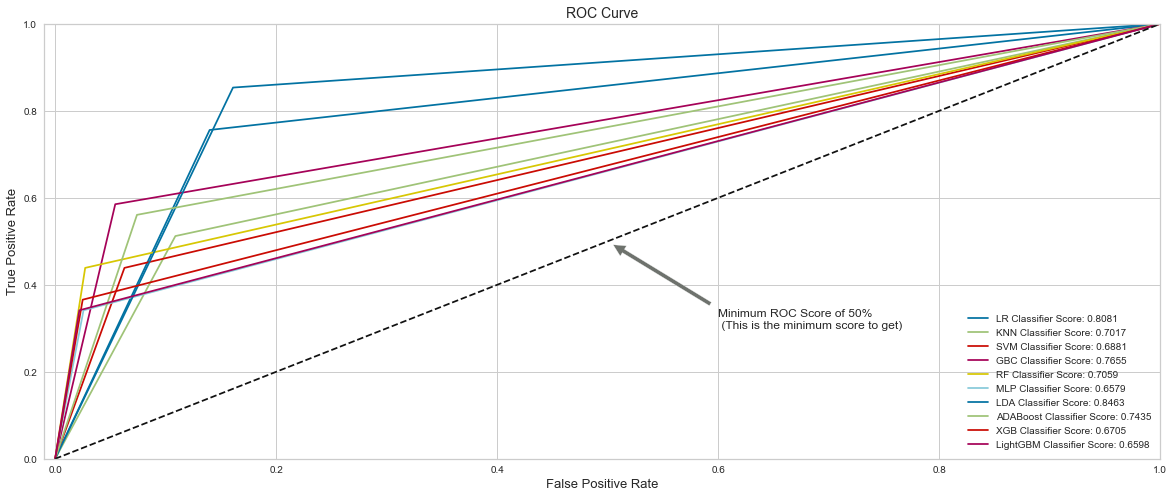

In [120]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_phate, y_train.values.ravel(),models)

In [121]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

,Model,Accuracy,F1,Recall,Precision
4,RF,0.829013,0.623552,0.909436,0.613014
1,KNN,0.824184,0.619009,0.908516,0.610328
8,XGB,0.813757,0.611794,0.897426,0.607719
9,LightGBM,0.809182,0.608110,0.898156,0.604370
3,GBC,0.783371,0.587790,0.858935,0.597273
2,SVM,0.778795,0.579498,0.826612,0.598370
7,ADABoost,0.757691,0.564693,0.812644,0.592008
5,MLP,0.432275,0.367496,0.615516,0.567478
6,LDA,0.281863,0.311256,0.604709,0.501789
0,LR,0.108960,0.134865,0.547779,0.501568


In [122]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## MLflow

In [123]:
!pip install mlflow

In [124]:
!pip install hyperopt

In [125]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll import scope
from IPython.display import Image
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

In [126]:
hyperparameters = {"max_depth":scope.int(hp.quniform("max_depth",2,100,5)),
                "n_estimators":scope.int(hp.quniform("n_estimators",2,100,1)),
                "num_leaves": scope.int(hp.quniform("num_leaves",2,50,1)),
                "reg_alpha": hp.loguniform('reg_li',-5,5),
                "random_state":1,
                "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
                "min_child_weight": hp.uniform('min_child_weight', 0.5, 10),
                "boosting": hp.choice("boosting",["gbdt","dart","goss"]),
                "objective":"binary"}

In [142]:
def train_model(parameters):
    mlflow.lightgbm.autolog()
    with mlflow.start_run(nested=True):
        booster = lgb.LGBMClassifier()
        booster.set_params(**parameters)
        booster.fit(X_train_prepared,y_train.values.ravel())
        
        mlflow.log_params(parameters)
        
        score = cross_val_score(booster, X_train_prepared, y_train.values.ravel(), cv=5, scoring = "f1_macro",n_jobs=-1)
        mean_score = np.mean(score)
        
        mlflow.log_metric('f1_macro', mean_score)
        
        return{'status':STATUS_OK,
               "loss":mean_score,
               'booster':booster.get_params}
    
with mlflow.start_run(run_name='lightgbm_bankruptcy'):
    best_params = fmin(
        fn=train_model,
        space=hyperparameters,
        algo=tpe.suggest,
        max_evals = 50,
        trials = Trials(),
        rstate=np.random.RandomState(1))

100%|██████████| 50/50 [01:29<00:00,  1.80s/trial, best loss: 0.867264648355777] 


## Real Model

In [144]:
import mlflow
df = mlflow.search_runs(filter_string="metric.f1_macro > 0.8")

In [145]:
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1_macro,params.objective,params.random_state,params.num_leaves,params.min_child_weight,params.max_depth,params.boosting,params.reg_alpha,params.n_estimators,params.learning_rate,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.parentRunId,tags.mlflow.source.name
0,d036ffdbb6234ff39b1ab43d9d205e4c,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:56.992000+00:00,2021-09-11 02:35:58.178000+00:00,0.943656,binary,1,35,6.175478276698336,95,goss,0.24515670957639646,13,0.03366333941300689,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
1,5a9a6c4d9c9c43cfb425ba14825a0dac,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:53.461000+00:00,2021-09-11 02:35:56.907000+00:00,0.951422,binary,1,32,2.351430648147652,65,gbdt,0.038738739318843904,74,0.010068199924899011,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
2,84728bcb0d2749e4a7fbd4d311f3ee1a,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:50.358000+00:00,2021-09-11 02:35:53.346000+00:00,0.968972,binary,1,50,5.026900385170613,25,dart,0.013816120907719515,44,0.07276916099062206,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
3,059298293ad544b8a8093220962ddecb,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:49.260000+00:00,2021-09-11 02:35:50.273000+00:00,0.927189,binary,1,9,7.445603151612206,60,goss,0.08048688133776474,20,0.062126977899734606,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
4,b87e5532d4ef4b8c9f6150abfec4496c,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:47.503000+00:00,2021-09-11 02:35:49.159000+00:00,0.955613,binary,1,23,3.608455140690375,40,goss,0.007552114525833935,35,0.04312899679053812,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
5,ef5e41e65ff34840aefe6e906a64f1bb,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:45.152000+00:00,2021-09-11 02:35:47.432000+00:00,0.949757,binary,1,18,8.117157480200532,70,dart,2.2846133493903222,66,0.052929842809839346,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
6,bd304bb783654e2299e9ef9ebb7517f2,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:43.674000+00:00,2021-09-11 02:35:45.058000+00:00,0.922101,binary,1,6,6.631522422487283,80,goss,0.4025406785449673,59,0.03206648308193621,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
7,ba990d66ded24d8eb501269f4552e1b2,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:42.274000+00:00,2021-09-11 02:35:43.599000+00:00,0.967573,binary,1,30,9.289361874653986,95,dart,0.012263124715593708,20,0.1817456983510832,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
8,1589ac70d7254a65975cf3d3abf6177c,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:40.149000+00:00,2021-09-11 02:35:42.116000+00:00,0.928855,binary,1,9,8.588543734335598,85,goss,0.08946765945313577,79,0.016684245375713017,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...
9,2f63e23ce3ec4f5983190fe2ac1a2b73,0,FINISHED,file:///C:/Users/Jules/Documents/MLflow_Bankru...,2021-09-11 02:35:39.146000+00:00,2021-09-11 02:35:40.064000+00:00,0.946324,binary,1,2,9.654162579705538,60,goss,0.030807505302729937,69,0.3920948690677448,LOCAL,Jules,75de7a3be0cd4c7f99f569ea04e6ea77,C:\Users\Jules\anaconda3\lib\site-packages\ipy...


In [146]:
df.sort_values(by='metrics.f1_macro').iloc[0]

run_id                                      450f7a2720d1425c8d48c49afbbdc30a
experiment_id                                                              0
status                                                              FINISHED
artifact_uri               file:///C:/Users/Jules/Documents/MLflow_Bankru...
start_time                                  2021-09-11 02:29:37.174000+00:00
end_time                                    2021-09-11 02:29:37.676000+00:00
metrics.f1_macro                                                    0.867265
params.objective                                                      binary
params.random_state                                                        1
params.num_leaves                                                          2
params.min_child_weight                                    9.110528421379822
params.max_depth                                                          90
params.boosting                                                         goss

In [147]:
params = df.sort_values(by='metrics.f1_macro').iloc[0,7:16].to_dict()
params

{'params.objective': 'binary',
 'params.random_state': '1',
 'params.num_leaves': '2',
 'params.min_child_weight': '9.110528421379822',
 'params.max_depth': '90',
 'params.boosting': 'goss',
 'params.reg_alpha': '0.007423707389320735',
 'params.n_estimators': '54',
 'params.learning_rate': '0.014374743980761402'}

In [148]:
params["params.objective"]

'binary'

In [149]:
X_test_prepared = X_test_final[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

In [150]:
import lightgbm

In [151]:
train_data = lightgbm.Dataset(X_train_prepared, label=y_train)
valid_data = lightgbm.Dataset(X_test_prepared, label=y_test)
test_data = lightgbm.Dataset(X_test_final_prepared, label=y_test_final)

In [152]:
X_train_prepared.shape

(7866, 51)

In [153]:
parameters = {
    'objective': params["params.objective"],
    'boosting': params["params.boosting"],
    'num_leaves': int(params["params.num_leaves"]),
    'learning_rate': float(params["params.learning_rate"]),
    'n_estimators': int(params["params.n_estimators"]),
    'min_child_weight': float(params["params.min_child_weight"]),
    'random_state': 1,
    'reg_alpha':float(params["params.reg_alpha"]),
    'max_depth': int(params["params.max_depth"])
}

In [154]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=valid_data)

2021/09/10 22:36:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '28b95d0aaf61479cbc1cf072819e69b3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current lightgbm workflow
C:\Users\Jules\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3933, number of negative: 3933
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12782
[LightGBM] [Info] Number of data points in the train set: 7866, number of used features: 51
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid_0's binary_logloss: 0.68418
[2]	valid_0's binary_logloss: 0.675431
[3]	valid_0's binary_logloss: 0.666691
[4]	valid_0's binary_logloss: 0.658321
[5]	valid_0's binary_logloss: 0.649956
[6]	valid_0's binary_logloss: 0.641942
[7]	valid_0's binary_logloss: 0.63393
[8]	valid_0's binary_logloss: 0.626253
[9]	valid_0's binary_logloss: 0.618575
[10]	valid_0's binary_

In [155]:
y_pred = model.predict(X_test_final_prepared)
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)

In [156]:
from sklearn.metrics import f1_score
f1_score(y_test_final, y_pred, average='weighted')

0.8783580918722558